In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [40]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [41]:
import DiadFit as pf
pf.__version__

'0.0.23'

In [42]:
# Add the path with your spectra in
meta_path=r'/Users/kyledayton/Downloads/09.15.22 Spectra and Text Files/Text Files 09.15.22'
spectra_path=r'/Users/kyledayton/Downloads/09.15.22 Spectra and Text Files/Spectra 09.15.22/09.15.22 CO2 Spectra Part 2/09.15.22 CO2 Spectra Low Rho Part 2'


In [43]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [44]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str='NE ',
                            exclude_str_2='NO CO2')
Diad_files[0:50]

exclude type
.png


['064 LM6 G2 MI7.txt',
 '066 LM6 G2 MI8.txt',
 '076 LM6 G4 MI1.txt',
 '078 LM6 G4 MI2.txt',
 '081 LM6 G5 MI1.txt',
 '083 LM6 G5 MI2.txt',
 '085 LM6 G6 MI1.txt',
 '087 LM6 G6 MI2.txt',
 '089 LM6 G7 MI1.txt',
 '091 LM6 G7 MI2.txt',
 '099 LM6 G10 MI1.txt',
 '103 LM6 G10 MI3.txt',
 '105 LM6 G10 MI4.txt',
 '111 LM6 G14 MI1.txt',
 '115 LM6 G14 MI3.txt']

## Must be a way of filtering them on strength...

In [45]:
max_diad1=np.empty(len(Diad_files), dtype=float)
max_diad2=np.empty(len(Diad_files), dtype=float)
index_diad=np.empty(len(Diad_files), dtype=float)
i=0
for file in Diad_files:
    
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    
    Med_LHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
    Med_RHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)])
    Med_LHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1360)])
    Med_RHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1440)& (Diad[:, 0]<1470)])    
    #Med_central_back_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)]
    
    Diad_diad1=Diad[(Diad[:, 0]>1280)& (Diad[:, 0]<1295)]
    Diad_diad2=Diad[(Diad[:, 0]>1385)& (Diad[:, 0]<1395)]
    max_diad1[i]=np.max(Diad_diad1[:, 1])-  (Med_LHS_diad1+Med_RHS_diad1)/2       
    max_diad2[i]=np.max(Diad_diad2[:, 1]) - (Med_LHS_diad2+Med_RHS_diad2)/2 
    index_diad[i]=i
    i=i+1


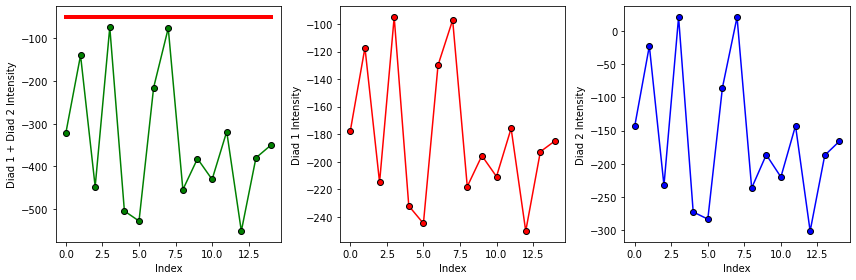

In [46]:
fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

combo_cutoff=-50

ax1.set_xlabel('Index')
ax2.set_xlabel('Index')
ax3.set_xlabel('Index')
ax3.set_ylabel('Diad 1 + Diad 2 Intensity')
ax2.set_ylabel('Diad 2 Intensity')
ax1.set_ylabel('Diad 1 Intensity')

ax1.plot(index_diad, max_diad1,  '-r')
ax1.plot(index_diad, max_diad1,  'ok', mfc='red')

ax2.plot(index_diad, max_diad2,  '-b')
ax2.plot(index_diad, max_diad2,  'ok', mfc='blue')

ax3.plot(index_diad, max_diad2+max_diad1,  '-g')
ax3.plot(index_diad, max_diad2+max_diad1,  'ok', mfc='green')
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_cutoff, combo_cutoff], '-r', lw=4)

## This gets dense diad files
Diad_Files_Dense=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)>combo_cutoff])
Diad_Files_Weak=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)<=combo_cutoff])

# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
fig.tight_layout()

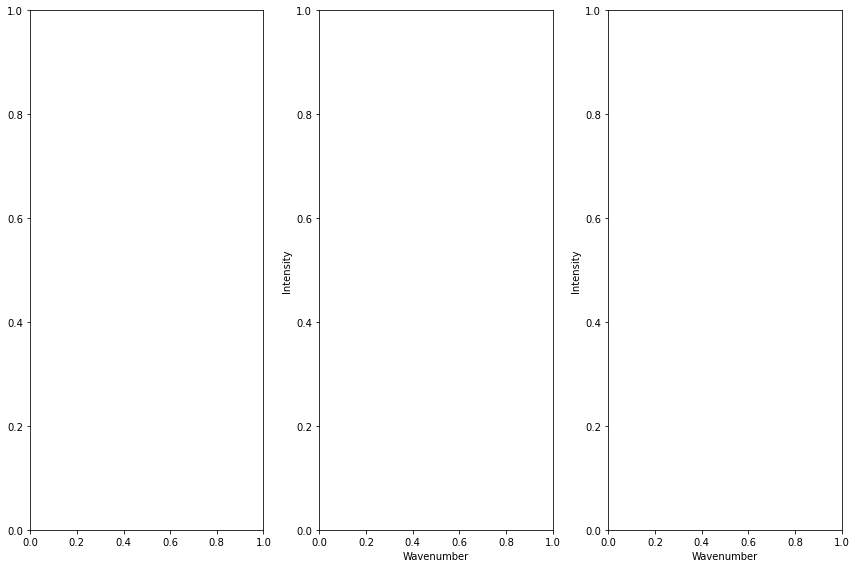

In [47]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Dense:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

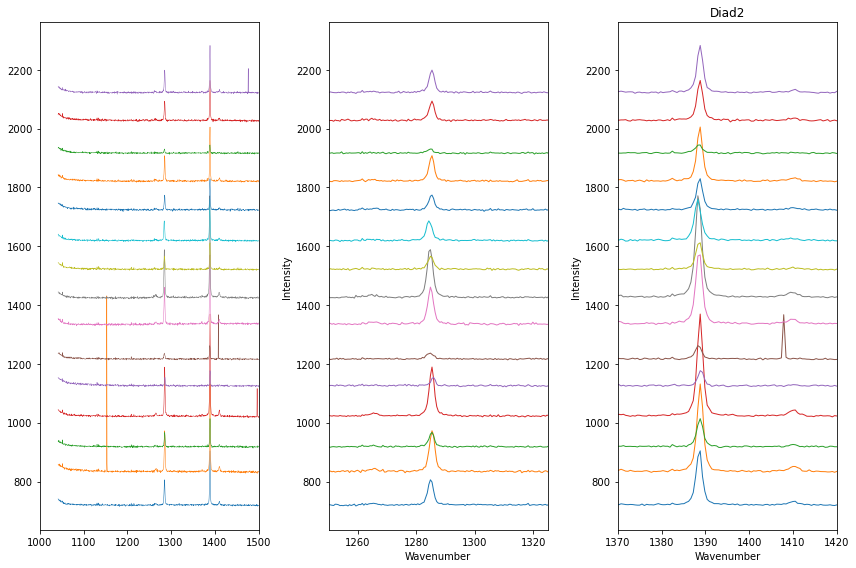

In [48]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
ax0.set_xlim([1000, 1500])
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+100
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

## Weak Diads first
- This allows you to tweak parameters for your spectra and your instrument

In [49]:
filename=Diad_Files_Weak[0] #'23 MP2_2_MIB_12mW.txt'#  # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

064 LM6 G2 MI7.txt


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

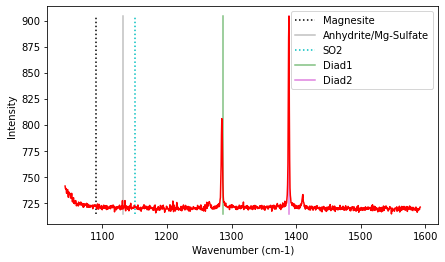

In [50]:
pf.plot_diad(path=spectra_path, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- First, look at the presets, you can edit them in carb_peak_config by typing the variable name, and a new value

In [51]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=False

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
Carb_Config=pf.carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330))
Carb_Config   

carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330), N_poly_carb_bck=1, amplitude=1000, cent_carbonate=1090, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True)

## This actually does the work fitting the carbonate peak

In [52]:
Carb_fit=pf.fit_carbonate_peak(config=Carb_Config, path=spectra_path, 
filename=filename, filetype=filetype,
fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [53]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

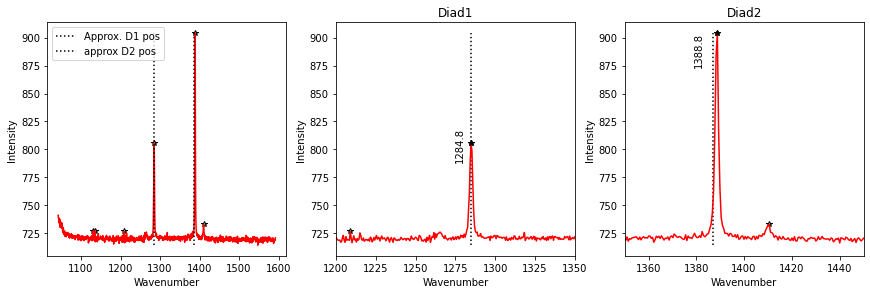

In [54]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=1
n_peaks_diad2=1 

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [55]:
diad2_peaks

(1388.805794,)

## If you have no diads visible...
- change True to False, and it will just save the carbonate peak parameters

In [56]:
diads_present=True
pf.proceed_to_fit_diads(filename, Carb_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. 
- For very dense diads, you may need to fit a gaussian background, defined by peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000
- Otherwise, the background is fitted with a polynomial you can set the degree for (Default =1) based on background positoins defined by lower_bck, upper_bck...
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [57]:
diad1_fit_config=pf.diad1_fit_config(x_range_residual=10, x_range_baseline=10,
                                    HB_amplitude=5, diad_amplitude=100)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1300, 1350), diad_amplitude=100, HB_amplitude=5, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1
0,1284.88074,256.161966,0.611235,0.611235,1.3286


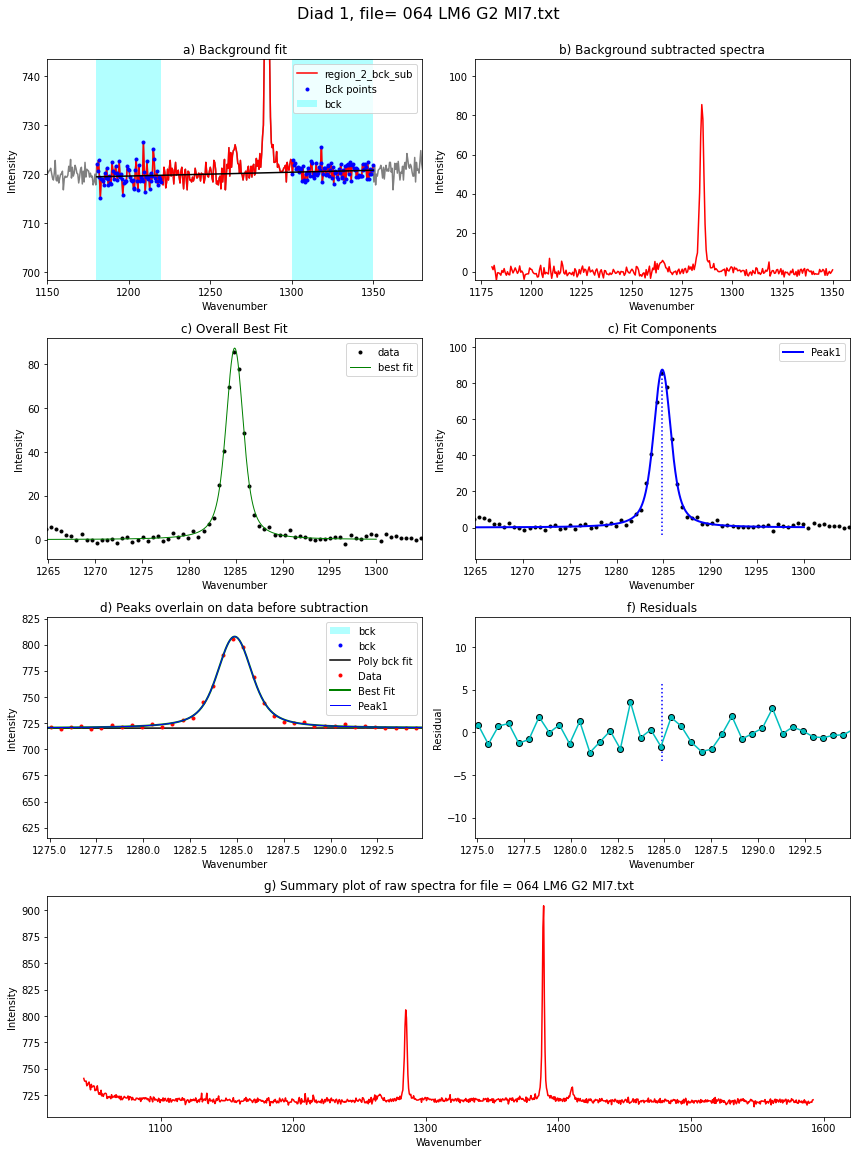

In [58]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 


# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad1_fit

## Fit diad 2

In [59]:
diad2_fit_config=pf.diad2_fit_config(x_range_residual=10, x_range_baseline=10)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1360), upper_bck_diad2=(1440, 1470), diad_amplitude=100, HB_amplitude=20, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2
0,1388.573815,412.908232,0.45902,0.45902,1.68955


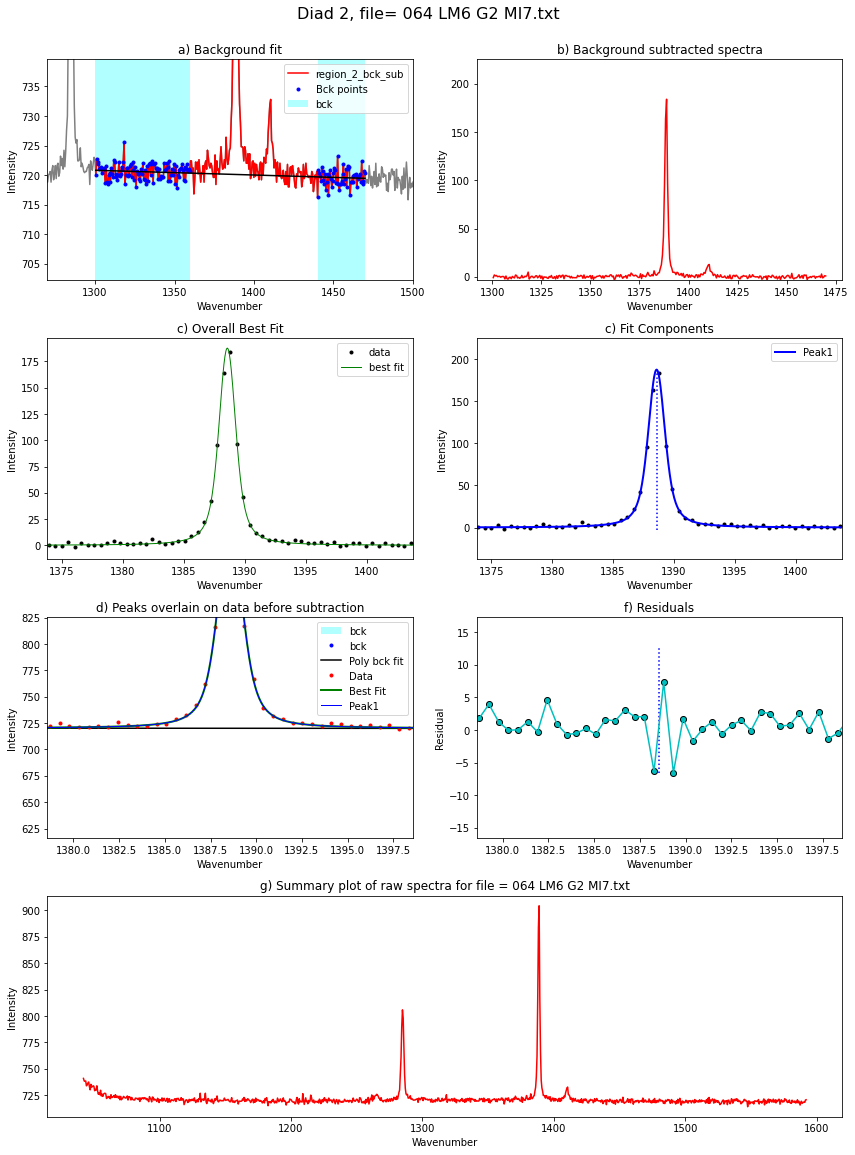

In [60]:
# Do you want to save the figure?
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "spectra_path" if to_csv=True)
- It also makes a new 

In [61]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=spectra_path,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,064 LM6 G2 MI7,103.693074,1284.88074,256.161966,0.611235,0.611235,1.3286,1388.573815,412.908232,0.45902,0.45902,1.68955,NaN,0,NaN,0,NaN,0


In [62]:
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,064 LM6 G2 MI7,103.693074,1284.88074,256.161966,0.611235,0.611235,1.3286,1388.573815,412.908232,0.45902,0.45902,1.68955,NaN,0,NaN,0,NaN,0


## You can also try looping if all your spectra are pretty similar

100%|███████████████████████████████████████████| 15/15 [00:25<00:00,  1.73s/it]


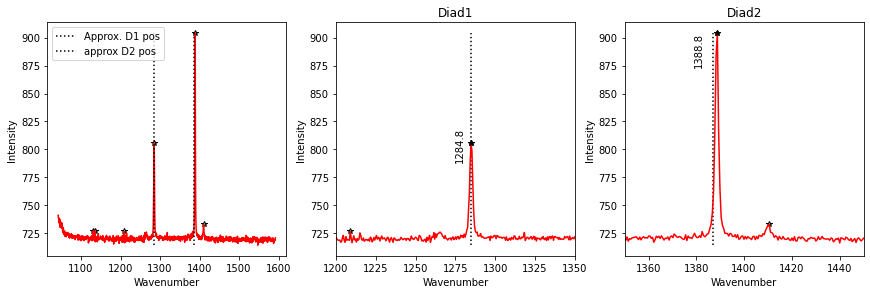

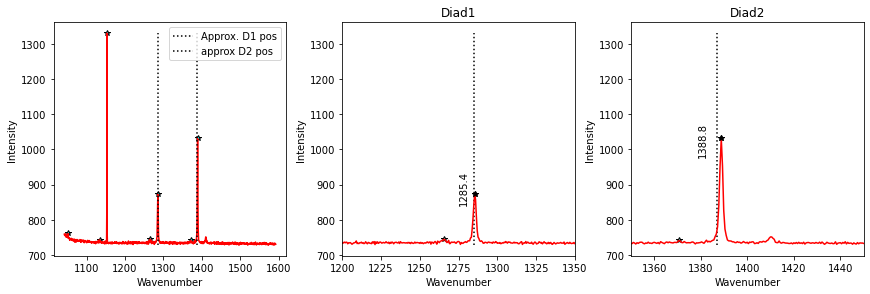

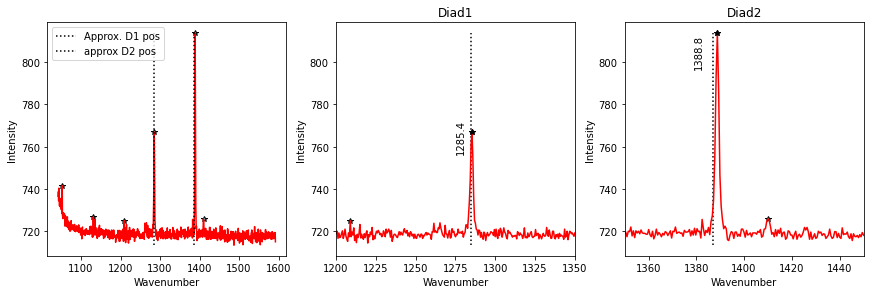

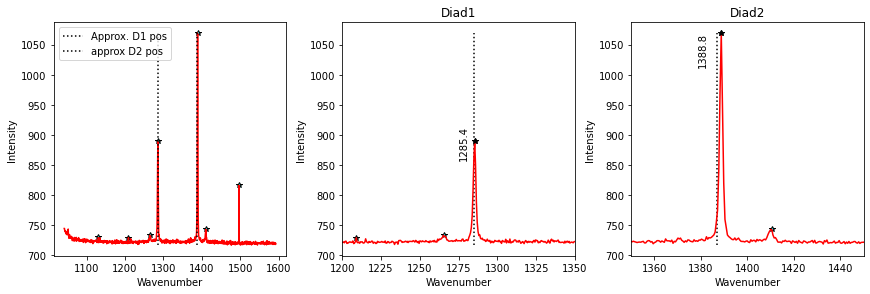

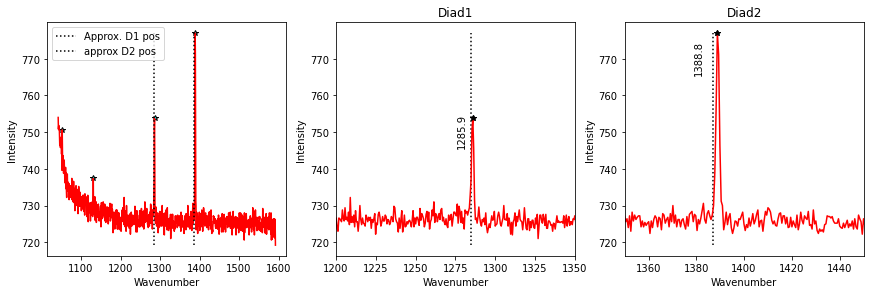

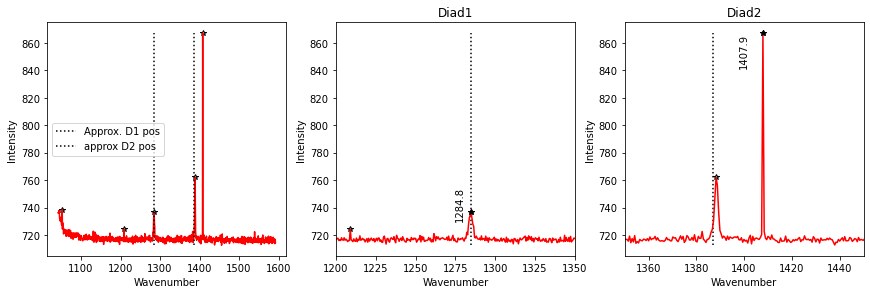

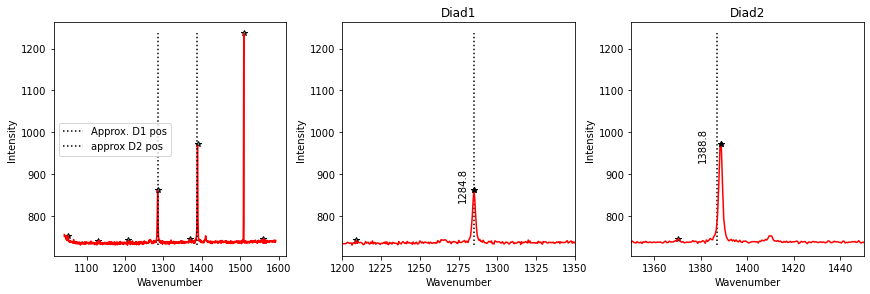

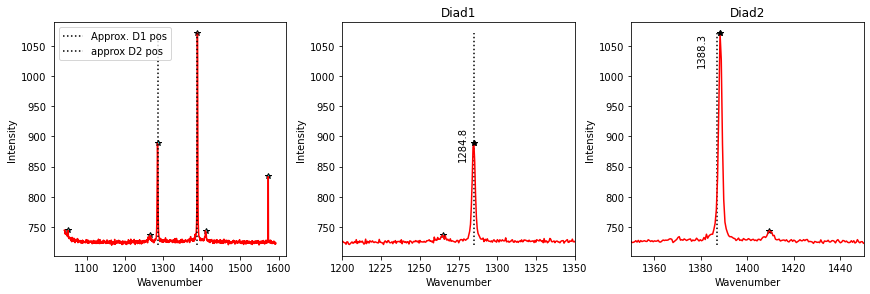

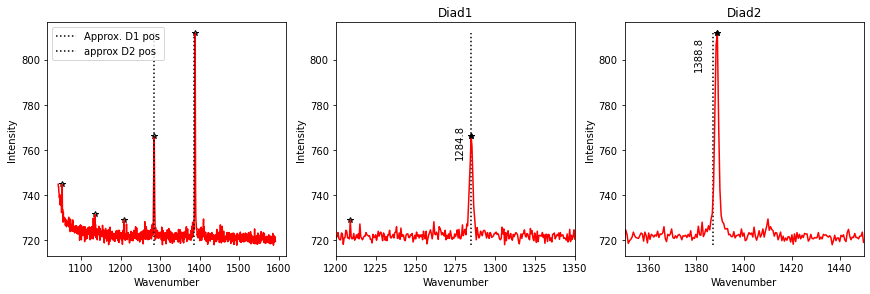

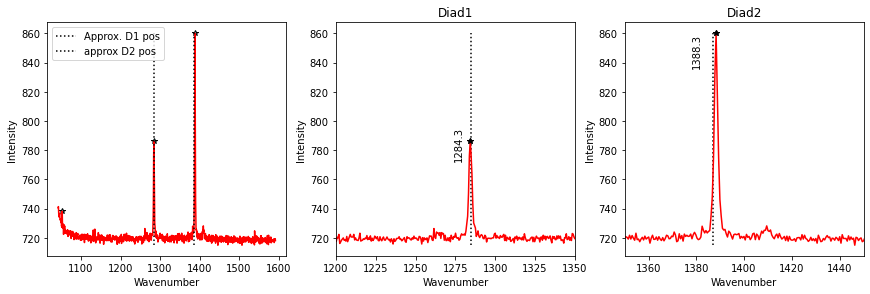

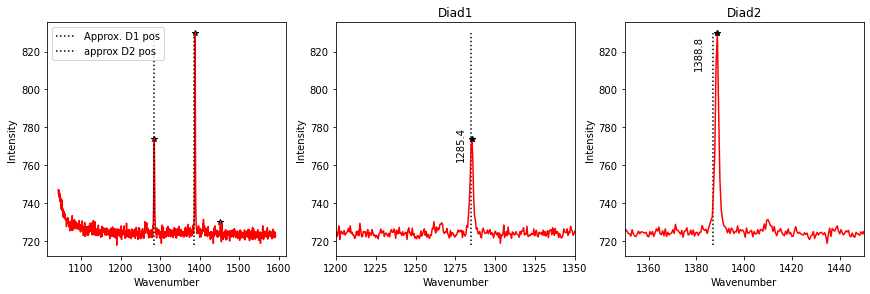

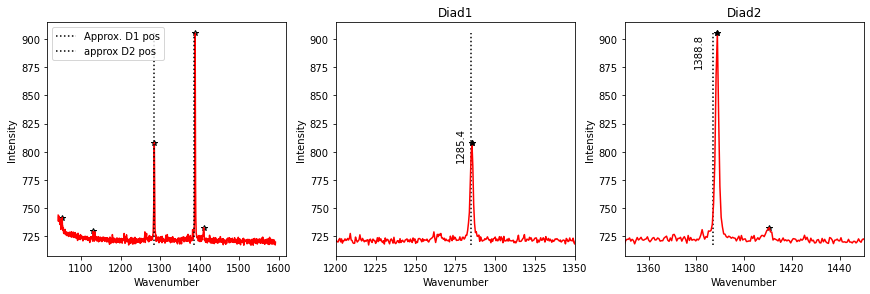

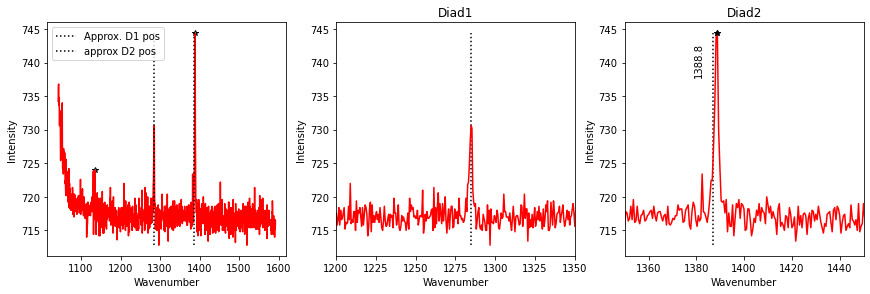

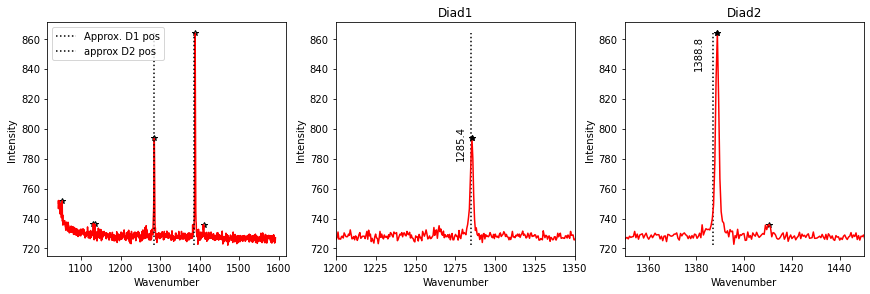

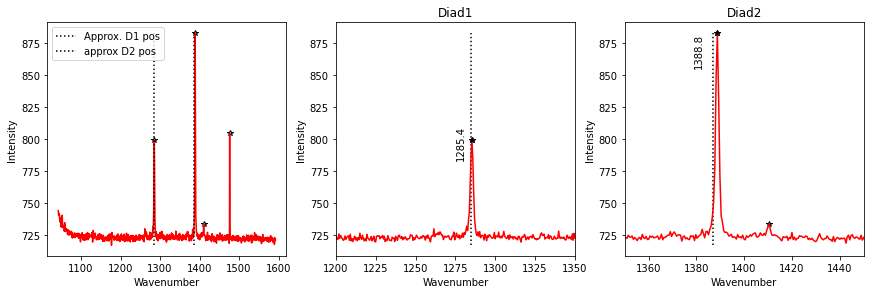

In [63]:
from tqdm import tqdm
plot_figure=True # Means doesnt have to make figures, lot faster. 
to_clipboard=False # Copies to clipboard
Diad_Files_Weak_i=Diad_Files_Weak
df_weak = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Weak))):
    
    filename=Diad_Files_Weak[i]

    
    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=True)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype)
    
    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype)
    
    data=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,
                                
Diad2_fit=Diad2_fit)
 

    df_weak = pd.concat([df_weak, data], axis=0)


In [64]:
df_weak

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,064 LM6 G2 MI7,103.693074,1284.880740,256.161966,0.611235,0.611235,1.328600,1388.573815,412.908232,0.459020,0.459020,1.689550,NaN,0,NaN,0,NaN,0
0,066 LM6 G2 MI8,103.405899,1285.388539,409.128072,0.608600,0.608600,1.933405,1388.794438,646.566331,0.452418,0.452418,2.334642,NaN,0,NaN,0,NaN,0
0,076 LM6 G4 MI1,103.537137,1285.213775,134.544712,0.571760,0.571760,1.238414,1388.750912,212.965736,0.462071,0.462071,1.459125,NaN,0,NaN,0,NaN,0
0,078 LM6 G4 MI2,103.488534,1285.273832,447.838529,0.565251,0.565251,1.582371,1388.762366,712.127728,0.433833,0.433833,2.563573,NaN,0,NaN,0,NaN,0
0,081 LM6 G5 MI1,103.210152,1285.746562,64.130969,0.457496,0.457496,1.338462,1388.956714,108.493749,0.418009,0.418009,1.409562,NaN,0,NaN,0,NaN,0
0,083 LM6 G5 MI2,103.776107,1284.619796,75.728850,0.793455,0.793455,1.065720,1388.395903,105.902202,0.475640,0.475640,2.186102,NaN,0,NaN,0,NaN,0
0,085 LM6 G6 MI1,103.647761,1284.887491,369.513732,0.621264,0.621264,1.868433,1388.535252,575.885849,0.481494,0.481494,1.934267,NaN,0,NaN,0,NaN,0
0,087 LM6 G6 MI2,103.743804,1284.676031,511.577029,0.633596,0.633596,1.754350,1388.419835,804.681643,0.478045,0.478045,2.571175,NaN,0,NaN,0,NaN,0
0,089 LM6 G7 MI1,103.632579,1284.911861,134.420303,0.640374,0.640374,1.277932,1388.544439,214.409559,0.473618,0.473618,1.260517,NaN,0,NaN,0,NaN,0
0,091 LM6 G7 MI2,103.857251,1284.385967,207.945757,0.647248,0.647248,1.256688,1388.243218,335.704071,0.508269,0.508269,1.705700,NaN,0,NaN,0,NaN,0


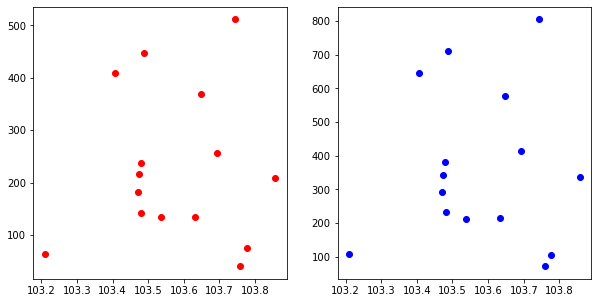

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_weak['Splitting'], df_weak['Diad1_Area'], 'or')
ax2.plot(df_weak['Splitting'], df_weak['Diad2_Area'], 'ob')

df_not_too_weak=df_weak.loc[(df_weak['Diad1_Area']>25) & (df_weak['Diad2_Area']>30)]

## Extracting metadata for these diads

In [66]:


# Put the common string you can in all your Ne lines here
ID_str='.txt'
file_ext_meta='.txt' # Will only take files of this type 
exclude_str='NE' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
diad_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

diad_meta#[0:20]


['LM0 G28 MI1 PHOTO.txt',
 'LM0 G28 MI1.txt',
 'LM0 G29 MI1 PHOTO.txt',
 'LM0 G29 MI1.txt',
 'LM0 G29 MI2 PHOTO.txt',
 'LM0 G29 MI2.txt',
 'LM0 G29 MI3 PHOTO.txt',
 'LM0 G29 MI3.txt',
 'LM0 G30 FI2 PHOTO.txt',
 'LM0 G30 FI2.txt',
 'LM0 G30 FI5 PHOTO.txt',
 'LM0 G30 FI5.txt',
 'LM0 G30 FI6 PHOTO.txt',
 'LM0 G30 FI6.txt',
 'LM0 G30 FI7 PHOTO.txt',
 'LM0 G30 FI7.txt',
 'LM0 G30 MI1 PHOTO.txt',
 'LM0 G30 MI1.txt',
 'LM0 G30 MI3 PHOTO.txt',
 'LM0 G30 MI3.txt',
 'LM0 G30 MI4 PHOTO.txt',
 'LM0 G30 MI4.txt',
 'LM0 G30 MI8 PHOTO.txt',
 'LM0 G30 MI8.txt',
 'LM0 G31 MI1 PHOTO.txt',
 'LM0 G31 MI1.txt',
 'LM0 G32 MI1 PHOTO.txt',
 'LM0 G32 MI1.txt',
 'LM0 G32 MI2 PHOTO.txt',
 'LM0 G32 MI2.txt',
 'LM0 G32 MI3 PHOTO.txt',
 'LM0 G32 MI3.txt',
 'LM0 G33 MI1 PHOTO.txt',
 'LM0 G33 MI1.txt',
 'LM0 G33 MI2 PHOTO.txt',
 'LM0 G33 MI2.txt',
 'LM0 G34 MI1 NO CO2.txt',
 'LM0 G34 MI1 PHOTO NO CO2.txt',
 'LM0 G35 MI1 PHOTO.txt',
 'LM0 G35 MI1.txt',
 'LM0 G39 MI1 PHOTO.txt',
 'LM0 G39 MI1.txt',
 'LM0 G40 MI1 PHOTO.

In [67]:
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=diad_meta, prefix=False,
                               trupower=True)

100%|███████████████████████████████████████| 114/114 [00:00<00:00, 2426.56it/s]

Done



/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/importing_data_files.py:594: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Df_2['index']=Time_Df_2.index


In [68]:
meta['filename']

1                      LM0 G28 MI1.txt
3                      LM0 G29 MI1.txt
5                      LM0 G29 MI2.txt
7                      LM0 G29 MI3.txt
17                     LM0 G30 MI1.txt
9                      LM0 G30 FI2.txt
19                     LM0 G30 MI3.txt
21                     LM0 G30 MI4.txt
11                     LM0 G30 FI5.txt
13                     LM0 G30 FI6.txt
15                     LM0 G30 FI7.txt
23                     LM0 G30 MI8.txt
25                     LM0 G31 MI1.txt
27                     LM0 G32 MI1.txt
29                     LM0 G32 MI2.txt
31                     LM0 G32 MI3.txt
33                     LM0 G33 MI1.txt
35                     LM0 G33 MI2.txt
36              LM0 G34 MI1 NO CO2.txt
39                     LM0 G35 MI1.txt
41                     LM0 G39 MI1.txt
43                     LM0 G40 MI1.txt
45                     LM0 G40 MI2.txt
47                      LM6 G1 MI1.txt
49                      LM6 G1 MI2.txt
69                      L

## Stitching metadata and data together

In [69]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],

   file_type='.txt')

file_m

array(['LM0 G28 MI1', 'LM0 G29 MI1', 'LM0 G29 MI2', 'LM0 G29 MI3',
       'LM0 G30 MI1', 'LM0 G30 FI2', 'LM0 G30 MI3', 'LM0 G30 MI4',
       'LM0 G30 FI5', 'LM0 G30 FI6', 'LM0 G30 FI7', 'LM0 G30 MI8',
       'LM0 G31 MI1', 'LM0 G32 MI1', 'LM0 G32 MI2', 'LM0 G32 MI3',
       'LM0 G33 MI1', 'LM0 G33 MI2', 'LM0 G34 MI1 NO CO2', 'LM0 G35 MI1',
       'LM0 G39 MI1', 'LM0 G40 MI1', 'LM0 G40 MI2', 'LM6 G1 MI1',
       'LM6 G1 MI2', 'LM6 G2 MI1', 'LM6 G2 MI2', 'LM6 G2 MI3',
       'LM6 G2 MI4', 'LM6 G2 MI5', 'LM6 G2 MI6', 'LM6 G2 MI7',
       'LM6 G2 MI8', 'LM6 G2 MI9', 'LM6 G3 MI1', 'LM6 G3 MI2',
       'LM6 G3 MI3', 'LM6 G4 MI1', 'LM6 G4 MI2', 'LM6 G5 MI1',
       'LM6 G5 MI2', 'LM6 G6 MI1', 'LM6 G6 MI2', 'LM6 G7 MI1',
       'LM6 G7 MI2', 'LM6 G7 MI3', 'LM6 G7 MI4', 'LM6 G9 MI1',
       'LM6 G10 MI1', 'LM6 G10 MI2', 'LM6 G10 MI3', 'LM6 G10 MI4',
       'LM6 G10 MI5', 'LM6 G10 MI6', 'LM6 G14 MI1',
       'LM6 G14 MI2 NO CO2 TOO DEEP', 'LM6 G14 MI3'], dtype=object)

In [70]:
df_not_too_weak['filename'].head()

0    064 LM6 G2 MI7
0    066 LM6 G2 MI8
0    076 LM6 G4 MI1
0    078 LM6 G4 MI2
0    081 LM6 G5 MI1
Name: filename, dtype: object

In [71]:
type(df_not_too_weak['filename'])

pandas.core.series.Series

In [72]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df_not_too_weak['filename'].reset_index(drop=True),
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['LM6 G2 MI7', 'LM6 G2 MI8', 'LM6 G4 MI1', 'LM6 G4 MI2',
       'LM6 G5 MI1', 'LM6 G5 MI2', 'LM6 G6 MI1', 'LM6 G6 MI2',
       'LM6 G7 MI1', 'LM6 G7 MI2', 'LM6 G10 MI1', 'LM6 G10 MI3',
       'LM6 G10 MI4', 'LM6 G14 MI1', 'LM6 G14 MI3'], dtype=object)

In [73]:
# Combining them together
meta['name_for_matching']=file_m
df_not_too_weak['name_for_matching']=file_s
df_combo=df_not_too_weak.merge(meta, on='name_for_matching')

In [74]:
file_s

array(['LM6 G2 MI7', 'LM6 G2 MI8', 'LM6 G4 MI1', 'LM6 G4 MI2',
       'LM6 G5 MI1', 'LM6 G5 MI2', 'LM6 G6 MI1', 'LM6 G6 MI2',
       'LM6 G7 MI1', 'LM6 G7 MI2', 'LM6 G10 MI1', 'LM6 G10 MI3',
       'LM6 G10 MI4', 'LM6 G14 MI1', 'LM6 G14 MI3'], dtype=object)

In [75]:
file_m

array(['LM0 G28 MI1', 'LM0 G29 MI1', 'LM0 G29 MI2', 'LM0 G29 MI3',
       'LM0 G30 MI1', 'LM0 G30 FI2', 'LM0 G30 MI3', 'LM0 G30 MI4',
       'LM0 G30 FI5', 'LM0 G30 FI6', 'LM0 G30 FI7', 'LM0 G30 MI8',
       'LM0 G31 MI1', 'LM0 G32 MI1', 'LM0 G32 MI2', 'LM0 G32 MI3',
       'LM0 G33 MI1', 'LM0 G33 MI2', 'LM0 G34 MI1 NO CO2', 'LM0 G35 MI1',
       'LM0 G39 MI1', 'LM0 G40 MI1', 'LM0 G40 MI2', 'LM6 G1 MI1',
       'LM6 G1 MI2', 'LM6 G2 MI1', 'LM6 G2 MI2', 'LM6 G2 MI3',
       'LM6 G2 MI4', 'LM6 G2 MI5', 'LM6 G2 MI6', 'LM6 G2 MI7',
       'LM6 G2 MI8', 'LM6 G2 MI9', 'LM6 G3 MI1', 'LM6 G3 MI2',
       'LM6 G3 MI3', 'LM6 G4 MI1', 'LM6 G4 MI2', 'LM6 G5 MI1',
       'LM6 G5 MI2', 'LM6 G6 MI1', 'LM6 G6 MI2', 'LM6 G7 MI1',
       'LM6 G7 MI2', 'LM6 G7 MI3', 'LM6 G7 MI4', 'LM6 G9 MI1',
       'LM6 G10 MI1', 'LM6 G10 MI2', 'LM6 G10 MI3', 'LM6 G10 MI4',
       'LM6 G10 MI5', 'LM6 G10 MI6', 'LM6 G14 MI1',
       'LM6 G14 MI2 NO CO2 TOO DEEP', 'LM6 G14 MI3'], dtype=object)

In [76]:
df_combo

,filename_x,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,064 LM6 G2 MI7,103.693074,1284.880740,256.161966,0.611235,0.611235,1.328600,1388.573815,412.908232,0.459020,...,"September 15, 2022\n",4.985,45.0,5.0,100.0,"['0h', '3m', '47s']",7:34:04 PM\n,70444.0,1324.929,81
1,066 LM6 G2 MI8,103.405899,1285.388539,409.128072,0.608600,0.608600,1.933405,1388.794438,646.566331,0.452418,...,"September 15, 2022\n",4.986,45.0,5.0,50.0,"['0h', '3m', '47s']",7:43:44 PM\n,71024.0,1324.929,83
2,076 LM6 G4 MI1,103.537137,1285.213775,134.544712,0.571760,0.571760,1.238414,1388.750912,212.965736,0.462071,...,"September 15, 2022\n",5.016,45.0,5.0,100.0,"['0h', '3m', '47s']",8:26:52 PM\n,73612.0,1324.929,93
3,078 LM6 G4 MI2,103.488534,1285.273832,447.838529,0.565251,0.565251,1.582371,1388.762366,712.127728,0.433833,...,"September 15, 2022\n",5.025,45.0,5.0,100.0,"['0h', '3m', '47s']",8:35:18 PM\n,74118.0,1324.929,95
4,081 LM6 G5 MI1,103.210152,1285.746562,64.130969,0.457496,0.457496,1.338462,1388.956714,108.493749,0.418009,...,"September 15, 2022\n",5.040,45.0,5.0,50.0,"['0h', '3m', '47s']",8:47:21 PM\n,74841.0,1324.929,97
5,083 LM6 G5 MI2,103.776107,1284.619796,75.728850,0.793455,0.793455,1.065720,1388.395903,105.902202,0.475640,...,"September 15, 2022\n",5.042,45.0,5.0,100.0,"['0h', '3m', '47s']",8:54:49 PM\n,75289.0,1324.929,99
6,085 LM6 G6 MI1,103.647761,1284.887491,369.513732,0.621264,0.621264,1.868433,1388.535252,575.885849,0.481494,...,"September 15, 2022\n",5.039,45.0,5.0,100.0,"['0h', '3m', '47s']",9:03:25 PM\n,75805.0,1324.929,101
7,087 LM6 G6 MI2,103.743804,1284.676031,511.577029,0.633596,0.633596,1.754350,1388.419835,804.681643,0.478045,...,"September 15, 2022\n",5.040,45.0,5.0,100.0,"['0h', '3m', '47s']",9:11:11 PM\n,76271.0,1324.929,103
8,089 LM6 G7 MI1,103.632579,1284.911861,134.420303,0.640374,0.640374,1.277932,1388.544439,214.409559,0.473618,...,"September 15, 2022\n",5.027,45.0,5.0,50.0,"['0h', '3m', '47s']",9:20:06 PM\n,76806.0,1324.929,105
9,091 LM6 G7 MI2,103.857251,1284.385967,207.945757,0.647248,0.647248,1.256688,1388.243218,335.704071,0.508269,...,"September 15, 2022\n",5.031,45.0,5.0,100.0,"['0h', '3m', '47s']",9:29:31 PM\n,77371.0,1324.929,107


## Now load in the model for doing the Ne fitting

In [77]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_09.15.22_part2.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [78]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])
df_combo.insert(2, 'Ne Corr', df_combo['Ne_Correction'])

In [79]:
density_df=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])

In [80]:
df_combo.insert(1, 'Density', density_df['Preferred D'])

In [81]:
df_combo.to_clipboard(excel=True)

In [82]:
df_FIs=df_combo.loc[df_combo['filename_x'].str.contains('FI')]

In [85]:
df_combo

,filename_x,Density,Corrected_Splitting,Ne Corr,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction
0,064 LM6 G2 MI7,0.438211,103.783651,1.000874,103.693074,1284.880740,256.161966,0.611235,0.611235,1.328600,...,4.985,45.0,5.0,100.0,"['0h', '3m', '47s']",7:34:04 PM\n,70444.0,1324.929,81,1.000874
1,066 LM6 G2 MI8,0.308307,103.496098,1.000872,103.405899,1285.388539,409.128072,0.608600,0.608600,1.933405,...,4.986,45.0,5.0,50.0,"['0h', '3m', '47s']",7:43:44 PM\n,71024.0,1324.929,83,1.000872
2,076 LM6 G4 MI1,0.366518,103.626899,1.000867,103.537137,1285.213775,134.544712,0.571760,0.571760,1.238414,...,5.016,45.0,5.0,100.0,"['0h', '3m', '47s']",8:26:52 PM\n,73612.0,1324.929,93,1.000867
3,078 LM6 G4 MI2,0.344636,103.578148,1.000866,103.488534,1285.273832,447.838529,0.565251,0.565251,1.582371,...,5.025,45.0,5.0,100.0,"['0h', '3m', '47s']",8:35:18 PM\n,74118.0,1324.929,95,1.000866
4,081 LM6 G5 MI1,0.224107,103.299377,1.000864,103.210152,1285.746562,64.130969,0.457496,0.457496,1.338462,...,5.040,45.0,5.0,50.0,"['0h', '3m', '47s']",8:47:21 PM\n,74841.0,1324.929,97,1.000864
5,083 LM6 G5 MI2,0.476457,103.865730,1.000864,103.776107,1284.619796,75.728850,0.793455,0.793455,1.065720,...,5.042,45.0,5.0,100.0,"['0h', '3m', '47s']",8:54:49 PM\n,75289.0,1324.929,99,1.000864
6,085 LM6 G6 MI1,0.416755,103.737169,1.000863,103.647761,1284.887491,369.513732,0.621264,0.621264,1.868433,...,5.039,45.0,5.0,100.0,"['0h', '3m', '47s']",9:03:25 PM\n,75805.0,1324.929,101,1.000863
7,087 LM6 G6 MI2,0.461248,103.833201,1.000862,103.743804,1284.676031,511.577029,0.633596,0.633596,1.754350,...,5.040,45.0,5.0,100.0,"['0h', '3m', '47s']",9:11:11 PM\n,76271.0,1324.929,103,1.000862
8,089 LM6 G7 MI1,0.409684,103.721774,1.000861,103.632579,1284.911861,134.420303,0.640374,0.640374,1.277932,...,5.027,45.0,5.0,50.0,"['0h', '3m', '47s']",9:20:06 PM\n,76806.0,1324.929,105,1.000861
9,091 LM6 G7 MI2,0.514501,103.946529,1.000860,103.857251,1284.385967,207.945757,0.647248,0.647248,1.256688,...,5.031,45.0,5.0,100.0,"['0h', '3m', '47s']",9:29:31 PM\n,77371.0,1324.929,107,1.000860


In [86]:
df_combo.to_excel('091522_lowrho_MIs_FIs_part2.xlsx')